### Análise de dados das inscrições para o concurso público da SEMED da Prefeitura de Maricá (2024)

Este projeto visa coletar, tratar e analisar os dados da Lista Geral Preliminar das inscrições confirmadas para o concurso público da SEMED da Prefeitura de Maricá
Url do arquivo: https://portal.coseac.uff.br/wp-content/uploads/sites/596/2024/04/Concurso-PMM-SEMED20241-ListaGeralPreliminardasinscricoesconfirmadas.pdf
Data de acesso: 02 de maio de 2024

### Análise inicial do arquivo pdf
Número de páginas: 1994

Característiras: Todas as páginas apresentam-se padronizadas com a seguite estrutura:
- Cabeçalho;
- Tabela com as seguintes colunas: Inscrição, Requerimento, Nome do Candidato, Data de Nascimento, Cargo e Tipo de Vaga.
- Rodapé com legendas.

À esqueda, amostra de uma página do documento pdf;
À direita, divisão do documento em três partes principais.


<img src="img/amostra_pagina_documento.png" height="400"/>


<img src="img/modelo_arquivo_marica.png" height="400" />

### Bibliotecas Python utilizadas:
- pdfplumber: para a leitura do arquivo
- pandas: para a limpeza e tratamento dos dados
- matplotlib: para geração de gráficos

In [39]:
import pandas as pd
import pdfplumber
import matplotlib.pyplot as plt

### Leitura do arquivo .pdf
Abrindo-se o arquivo pdf, verificou-se grande similaridade nas páginas.

O código abaixo visa identificar o cabeçalho e a primeira linha da tabela (colunas) em cada página, automatizando o processo de verificação de similaridade das páginas;

Essas colunas (primeira linha da tabela), por apresentarem quebra na linha serão formatadas posteriormente;

Verifica-se que os cabeçalhos de todas as páginas tem a mesma estrutura: Inicia na linha 0 e vai até a linha 7;

A última página contém o número total de inscrições: 69770.



### Código para auxílio na análise exploratória.
### Verificando se os cabeçalhos de todas as páginas são iguais.

In [8]:
path_to_file = "Concurso-PMM-SEMED20241-ListaGeralPreliminardasinscricoesconfirmadas.pdf"

with pdfplumber.open(path_to_file) as pdf:
    page_0_header = [pdf.pages[0].extract_text().split("\n")[i] for i in range(8) if i != 2]
    
    for i in range(0, 1994):
        page = pdf.pages[i]
        text = page.extract_text()
        page_x_header = [text.split("\n")[i] for i in range(8) if i != 2]
        
        if page_0_header != page_x_header:
            page_number = text.split("\n")[2]
            advise = f'There is diferent header on the page {page_number}'
            print(advise)
            break
    
    print("All headers are the same!")

All headers are the same!


### Criando e preenchendo uma lista que será usada na geração do dataframe inicial.
### Colunas selecionadas: Cargo pretendido e Tipo de vaga.

In [9]:
path_to_file = "Concurso-PMM-SEMED20241-ListaGeralPreliminardasinscricoesconfirmadas.pdf"
all_lines_to_dataframe = [["Cargo", "TipoVaga"]]

In [10]:
def find_cargo_column(unformated_line):
    """
    Identifica a posição da palavra inicial do Cargo em uma linha.
    """
    docente_position = 0
    for j in range(len(unformated_line)):
        if "Docente" in unformated_line[j]:
            docente_position = j
    return(docente_position)

In [17]:
with pdfplumber.open(path_to_file) as pdf:
       
    for i in range(0, 1994):
        page = pdf.pages[i]
        text = page.extract_text()
        
        if "Inscritos: 69770" in text: #Verifica se é a última página
            for i in range(8, 23):
                unformated_line = text.split('\n')[i].split(' ')
                all_lines_to_dataframe.append([" ".join(unformated_line[find_cargo_column(unformated_line):-1]), unformated_line[-1]])
        else:
            counter = 0
            limit_line_number = 0
            for line in text.split('\n'):
                counter = counter + 1
                if "Tipo de Vaga" in line:
                    limit_line_number = counter
           
            for i in range(8, limit_line_number-1):
                unformated_line = text.split('\n')[i].split(' ')
                all_lines_to_dataframe.append([" ".join(unformated_line[find_cargo_column(unformated_line):-1]), unformated_line[-1]])

## Gerando o dataframe inicial

In [40]:
df = pd.DataFrame(all_lines_to_dataframe)
df.columns = df.iloc[0]
df = df[1:]
df

,Cargo,TipoVaga
1,Docente I - Geografia,AC
2,Docente I - Ciências Físicas e Biológicas,AC
3,Docente I - Geografia,AC
4,Docente I - História,AC
5,Docente I - Educação Física,AC
...,...,...
69766,Docente I - História,AC
69767,Docente II,AC
69768,Docente II,AC
69769,Docente II,AC


## Criação de um arquivo .csv com os dados sobre Cargo e Tipo de Vaga

In [19]:
df.to_csv('Marica_Cargo_TipoVaga.csv')

## Análise prévia do arquivo csv gerado a partir dos dados originais

In [41]:
df_from_csv = pd.read_csv("Marica_Cargo_TipoVaga.csv")
df_from_csv = df_from_csv[["Cargo", "TipoVaga"]]
df_from_csv

,Cargo,TipoVaga
0,Docente I - Geografia,AC
1,Docente I - Ciências Físicas e Biológicas,AC
2,Docente I - Geografia,AC
3,Docente I - História,AC
4,Docente I - Educação Física,AC
...,...,...
69765,Docente I - História,AC
69766,Docente II,AC
69767,Docente II,AC
69768,Docente II,AC


In [42]:
df_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69770 entries, 0 to 69769
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cargo     69770 non-null  object
 1   TipoVaga  69770 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


## Agrupando os dados por Cargo

In [43]:
grouped_data_1 = df_from_csv.groupby(["Cargo"]).size().reset_index(name="Total")
grouped_data_1

,Cargo,Total
0,Docente I - Artes,2879
1,Docente I - Ciências Físicas e Biológicas,6409
2,Docente I - Educação Física,6806
3,Docente I - Geografia,3349
4,Docente I - História,5756
5,Docente I - Língua Estrangeira - Inglês,2410
6,Docente I - Língua Portuguesa,7806
7,Docente I - Matemática,5005
8,Docente II,29350


### Gerando gráfico de Setor

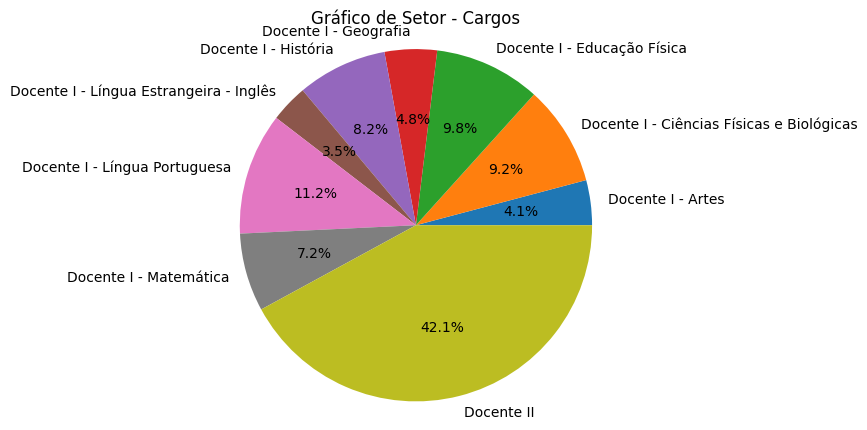

In [49]:
plt.figure(figsize=(5, 5))
plt.pie(grouped_data_1['Total'], labels=grouped_data_1['Cargo'], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Gráfico de Setor - Cargos')
plt.show()